In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [ ]:
genome_desc = pd.read_csv('../input/genome_file_description.csv')
genome = pd.read_csv('../input/genome_zeeshan_usmani.csv')

In [ ]:
genome.head()

In [ ]:
genome["chromosome"].value_counts()

In [ ]:
chromosomes = {k: v for k, v in genome.groupby('chromosome')}

In [ ]:
chromosomes.keys()

In [ ]:
for i in chromosomes:
    chromosomes[i].sort_values(by='position')

In [ ]:
print(chromosomes[1][0:10])
print(chromosomes['X'][0:10])

For more info on the dataset and how it is obtained I read here: https://customercare.23andme.com/hc/en-us/articles/115004459928-Raw-Genotype-Data-Technical-Details

# **Some single SNP analysis (Based on research from SNPedia)**

**Sex**



In [ ]:
chromosomes.keys()

In [ ]:
genome.loc[genome['chromosome'] == 'Y'].head()

There is a Y chromosome with SNP data present so the patient is a male.

**Eye color**


In [ ]:
genome.loc[genome['# rsid'].isin(['rs4778241','rs12913832','rs7495174', 'rs8028689', 'rs7183877', 'rs1800401'])] #genoset 237 for eye color - SNPedia. 


The subject is heterozygous in rs4778241 and rs7495174, which if homozygous C and A respectively, form a hapotype for blue-eyes association. Thus the subject likely does not have blue- eyes.

The rs1799971(G) allele in exon 1 of the mu opioid receptor OPRM1 gene causes the normal amino acid at residue 40, asparagine (Asn), to be replaced by aspartic acid (Asp). In the literature this SNP is also known as A118G, N40D, or Asn40Asp.

Carriers of at least one rs1799971(G) allele appear to have **stronger cravings for alcohol** than carriers of two rs1799971(A) alleles, and are thus hypothesized to be more at higher risk for alcoholism. [PMID 17207095]

In [ ]:
genome.loc[genome['# rsid'] == 'rs1799971']

Sample appears to be heterozygous - having one A allele and one G allele.
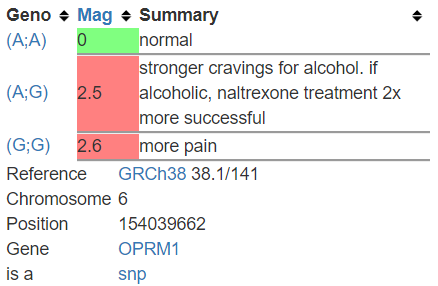


rs1333049 has been reported in a large study to be **associated with heart disease, in particular, coronary artery disease**.

The risk allele (oriented to the dbSNP entry) is most likely (C); the odds ratio associated with heterozygotes is 1.47 (CI 1.27-1.70), and for homozygotes, 1.9 (CI 1.61-2.24). [PMID 17554300OA-icon.png]

In [ ]:
genome.loc[genome['# rsid'] == 'rs1333049']

1. CG shown to have increased risk of coronary artery disease...
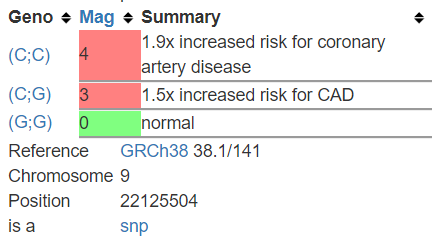

**Alzheimers:** 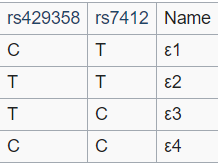

In [ ]:
genome.loc[genome['# rsid'] == 'rs7412']


In [ ]:
genome.loc[genome['# rsid'] == 'rs429358']

So this patient seems to have the ApoE-ε3 allele. 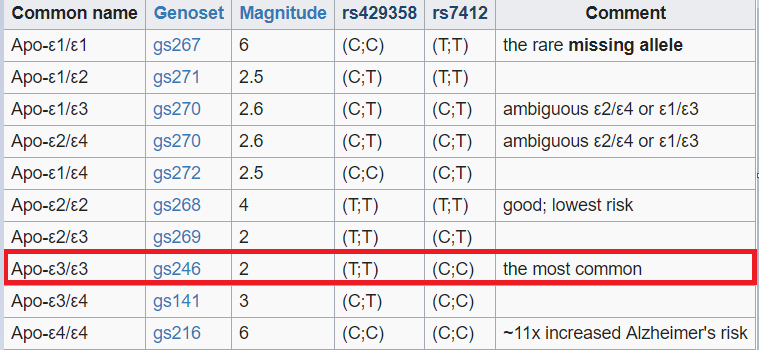
which does not seem to indicate elevated Alzheimer's risk from just looking at these 2 SNPs.

For further reference about Apo-e4 genotypes: 

APOE-ε4 carriers may have their risk of developing Alzheimer's disease modified by SNPs elsewhere in their genomes. For example:

rs2373115, a SNP in the GAB2 gene
Inheritance of the rs1799724(T) allele appears to synergistically increase the risk of Alzheimer's in ApoE-ε4 carriers and is associated with altered CSF Abeta42 levels [PMID 15895461]
A haplotype of 3 SNPs in the POLD1 gene; the combined presence of this POLD1 I-G-T haplotype and the ApoE-ε4 allele almost doubles the risk of AD (odds ratio: 10.09, CI: 3.88-26.25, =<0.0001) compared to ApoE-ε4 carriers alone.[PMID 17498878]

# (Possible) Clustering of SNP data

This genomic data can be treated as 1 datapoint with N features, where N is the number of SNPs in the dataset. Each SNP is a feature that could be a strong or weak predictor of a potential disease. 

Potentially could introduce more SNP data from different individuals and attempt an unsupervised clustering of sorts.

This type of analysis has been done [here](https://www.ncbi.nlm.nih.gov/pubmed/22025756) and [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2732271/)

Todo...